In [ ]:
# ================================
#  Librería: simulador cuantico
# MARIANA PARRA
# ================================
import numpy as np

#  Normalización
def normalize(ket):
    """Normaliza un vector ket complejo."""
    v = np.array(ket, dtype=complex)
    norm = np.linalg.norm(v)
    if norm == 0:
        raise ValueError("El vector no puede tener norma cero.")
    return v / norm

# Probabilidad
def probability(ket, position):
    """Probabilidad de encontrar la partícula en una posición dada."""
    v = normalize(ket)
    return np.abs(v[position])**2

#  Amplitud y probabilidad de transición
def transition_amplitude(ket1, ket2):
    """Amplitud de transición ⟨ket2|ket1⟩."""
    v1 = normalize(ket1)
    v2 = normalize(ket2)
    return np.vdot(v2, v1)

def transition_probability(ket1, ket2):
    """Probabilidad de transitar de ket1 a ket2."""
    amp = transition_amplitude(ket1, ket2)
    return np.abs(amp)**2

# Verificación de matrices
def is_unitary(U):
    """Verifica si una matriz es unitaria."""
    U = np.array(U, dtype=complex)
    return np.allclose(U.conj().T @ U, np.eye(U.shape[0]))

def is_hermitian(M):
    """Verifica si una matriz es hermitiana."""
    M = np.array(M, dtype=complex)
    return np.allclose(M, M.conj().T)

# Media y varianza
def expectation_value(M, ket):
    """Calcula el valor esperado de un observable en un estado dado."""
    v = normalize(ket)
    M = np.array(M, dtype=complex)
    return np.vdot(v, M @ v)

def variance(M, ket):
    """Calcula la varianza de un observable en un estado dado."""
    mean = expectation_value(M, ket)
    v = normalize(ket)
    M = np.array(M, dtype=complex)
    return np.vdot(v, (M - mean*np.eye(len(M))) @ (M - mean*np.eye(len(M))) @ v).real

# Evolución temporal
def time_evolution(U, ket, n):
    """Aplica U^n al estado inicial ket."""
    U = np.array(U, dtype=complex)
    v = normalize(ket)
    Un = np.linalg.matrix_power(U, n)
    return Un @ v


In [ ]:
import numpy as np

# Sección 4.1 - Simulador base

class QuantumSystem:
    def __init__(self, num_positions, amplitudes=None):
        """
        num_positions: número de posiciones discretas en la línea.
        amplitudes: vector de amplitudes (complejas). Si es None, se crea uniforme.
        """
        self.num_positions = num_positions
        if amplitudes is None:
            self.ket = np.ones(num_positions, dtype=complex) / np.sqrt(num_positions)
        else:
            amp = np.array(amplitudes, dtype=complex)
            self.ket = amp / np.linalg.norm(amp)

    def probability_at(self, position):
        """
        Devuelve la probabilidad de encontrar la partícula en la posición dada.
        """
        if position < 0 or position >= self.num_positions:
            raise IndexError("Posición fuera del rango")
        return np.abs(self.ket[position])**2

    def transition_probability(self, ket2):
        """
        Calcula la probabilidad de transición entre el estado actual y otro vector ket dado.
        """
        k2 = np.array(ket2, dtype=complex)
        k2 = k2 / np.linalg.norm(k2)
        amp = np.vdot(k2, self.ket)  # <k2|ket>
        return np.abs(amp)**2

# Reto 1 - Amplitud de transición
def transition_amplitude(ket1, ket2):
    k1 = np.array(ket1, dtype=complex)
    k1 /= np.linalg.norm(k1)
    k2 = np.array(ket2, dtype=complex)
    k2 /= np.linalg.norm(k2)
    return np.vdot(k2, k1)  # <ket2|ket1>

# Reto 2 - Hermiticidad, media y varianza
def is_hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

def expectation_value(matrix, ket):
    k = np.array(ket, dtype=complex)
    k = k / np.linalg.norm(k)
    return np.vdot(k, matrix @ k)

def variance(matrix, ket):
    mean = expectation_value(matrix, ket)
    I = np.eye(matrix.shape[0], dtype=complex)
    return np.real(expectation_value((matrix - mean*I) @ (matrix - mean*I), ket))

# Reto 3 - Autovalores y probabilidades de colapso
def measurement_distribution(observable, ket):
    """
    Devuelve autovalores, autovectores y probabilidades de colapso para cada autovector.
    """
    if not is_hermitian(observable):
        raise ValueError("La matriz no es hermitiana")
    ket = ket / np.linalg.norm(ket)
    vals, vecs = np.linalg.eigh(observable)
    probs = [np.abs(np.vdot(vecs[:,i], ket))**2 for i in range(len(vals))]
    return vals, vecs, np.array(probs)

# Reto 4 - Dinámica temporal
def time_evolution(U, ket, steps):
    """
    Devuelve el estado final luego de aplicar la matriz unitaria U 'steps' veces.
    """
    ket = ket / np.linalg.norm(ket)
    for _ in range(steps):
        ket = U @ ket
    return ket

# Ejemplo de uso

# Crear un sistema de 3 posiciones con estado inicial arbitrario
qs = QuantumSystem(3, [1+0j, 1j, 0])

print("Estado inicial ket:", qs.ket)

# Probabilidad en posición 1
print("Probabilidad en posición 1:", qs.probability_at(1))

# Transición a otro estado
otro_ket = [0, 1, 0]
print("Probabilidad de transición al estado [0,1,0]:", qs.transition_probability(otro_ket))

# Amplitud de transición directa entre dos kets
k1 = [1, 0]
k2 = [0, 1]
print("Amplitud de transición <k2|k1>:", transition_amplitude(k1, k2))

# Hermiticidad, media y varianza
A = np.array([[2, 0], [0, 3]], dtype=complex)
print("¿A es hermitiana?", is_hermitian(A))
print("Media de A en k1:", expectation_value(A, k1))
print("Varianza de A en k1:", variance(A, k1))

# Autovalores y distribución
vals, vecs, probs = measurement_distribution(A, k1)
print("Autovalores:", vals)
print("Probabilidades:", probs, "Suma =", probs.sum())

# Dinámica temporal con matriz unitaria (ej: rotación)
theta = np.pi/4
U = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]], dtype=complex)
final_ket = time_evolution(U, k1, 3)
print("Estado final tras evolución:", final_ket)


Estado inicial ket: [0.70710678+0.j         0.        +0.70710678j 0.        +0.j        ]
Probabilidad en posición 1: 0.4999999999999999
Probabilidad de transición al estado [0,1,0]: 0.4999999999999999
Amplitud de transición <k2|k1>: 0j
¿A es hermitiana? True
Media de A en k1: (2+0j)
Varianza de A en k1: 0.0
Autovalores: [2. 3.]
Probabilidades: [1. 0.] Suma = 1.0
Estado final tras evolución: [-0.70710678+0.j  0.70710678+0.j]


In [ ]:

# Ejercicio 4.3.1 — autovectores y probabilidades post-medición
# Find all the possible states the sysytem described in Exercise 4.2.2
# can transition into after measuramente has been carried out
import numpy as np

def post_measurement_states(observable, ket):
    """
    Devuelve:
      - vals: array de autovalores
      - states: lista de autovectores (columnas de 'vecs')
      - probs: probabilidades de colapso p_i = |<e_i|ket>|^2
    Requiere que 'observable' sea hermitiana.
    """
    M = np.array(observable, dtype=complex)
    if not is_hermitian(M):
        raise ValueError("La matriz no es hermitiana")
    ket_n = normalize(ket)
    vals, vecs = np.linalg.eigh(M)   # vecs[:,i] es el autovector i
    probs = np.array([np.abs(np.vdot(vecs[:,i], ket_n))**2 for i in range(vecs.shape[1])])
    states = [vecs[:,i] for i in range(vecs.shape[1])]
    return vals, states, probs

# --- Ejemplo 1: Pauli Z (2x2) con ket en superposición ---
O = np.array([[1,0],[0,-1]], dtype=complex)
ket = normalize([1/np.sqrt(2), 1/np.sqrt(2)])  # superposición |+> en Z

vals, states, probs = post_measurement_states(O, ket)
print("Observable (Pauli Z) - autovalores:", vals)
for i,(eig,p) in enumerate(zip(states, probs)):
    print(f"  Autovalor {vals[i]:.3f}: P(colapso) = {p:.4f}, estado post-medición (vector) = {states[i]}")

print("Suma de probabilidades:", probs.sum())

# --- Ejemplo 2: observable 3x3 con degeneración (opcional para ver comportamiento) ---
O2 = np.array([[2,0,0],[0,2,0],[0,0,5]], dtype=float)  # autovalores 2,2,5 (degeneración en 2)
ket2 = normalize([1/np.sqrt(2), 1/np.sqrt(2), 0])
vals2, states2, probs2 = post_measurement_states(O2, ket2)
print("\nObservable 3x3 (degenerado) - autovalores:", vals2)
print("Probabilidades:", probs2)
print("Suma de probabilidades (O2):", probs2.sum())


Observable (Pauli Z) - autovalores: [-1.  1.]
  Autovalor -1.000: P(colapso) = 0.5000, estado post-medición (vector) = [0.+0.j 1.+0.j]
  Autovalor 1.000: P(colapso) = 0.5000, estado post-medición (vector) = [1.+0.j 0.+0.j]
Suma de probabilidades: 1.0000000000000002

Observable 3x3 (degenerado) - autovalores: [2. 2. 5.]
Probabilidades: [0.5 0.5 0. ]
Suma de probabilidades (O2): 1.0000000000000002


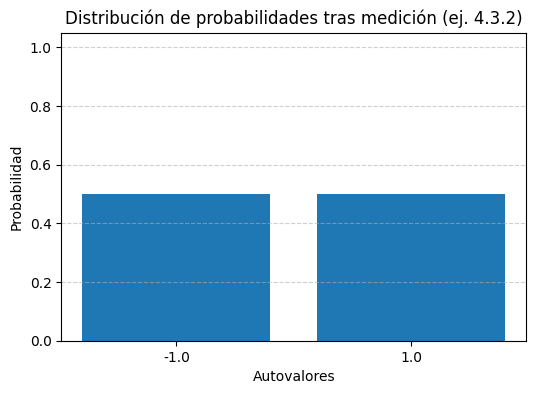

Media E[λ] = 0.000000+0.000000j
Varianza Var(λ) = 1.000000


In [ ]:

# Ejercicio 4.3.2 — gráfica, media y varianza
# Calculate and draw the probability distribution
import matplotlib.pyplot as plt
import numpy as np

def plot_measurement_distribution(observable, ket, figsize=(6,4)):
    vals, states, probs = post_measurement_states(observable, ket)
    # ordenar por autovalores para una gráfica ordenada
    order = np.argsort(vals)
    vals_ord = vals[order]
    probs_ord = probs[order]

    plt.figure(figsize=figsize)
    plt.bar([str(v) for v in vals_ord], probs_ord)
    plt.title("Distribución de probabilidades tras medición (ej. 4.3.2)")
    plt.xlabel("Autovalores")
    plt.ylabel("Probabilidad")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.ylim(0,1.05)
    plt.show()

    # media y varianza usando las funciones de la librería
    mean = expectation_value(observable, ket)
    var = variance(observable, ket)
    print(f"Media E[λ] = {mean:.6f}")
    print(f"Varianza Var(λ) = {var:.6f}")
    return vals, probs, mean, var

# --- Usar el Pauli Z y el ket de ejemplo ---
vals, probs, mean, var = plot_measurement_distribution(O, ket)

# Resultado esperado en este ejemplo:
#  - Probabilidades: 0.5 y 0.5
#  - Media = 0
#  - Varianza = 1


In [ ]:

# 🧪 Ejercicio 4.4.1: Matrices unitarias
# Verify that those matrix are unitary matrices, then multiply them and verify
# that their product is also unitary

U1 = np.array([[0, 1],
               [1, 0]], dtype=complex)

U2 = np.array([[np.sqrt(2)/2,  np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]], dtype=complex)

print("U1 es unitaria:", is_unitary(U1))
print("U2 es unitaria:", is_unitary(U2))
print("U1 * U2 es unitaria:", is_unitary(U1 @ U2))


U1 es unitaria: True
U2 es unitaria: True
U1 * U2 es unitaria: True


In [ ]:

# 🧪 Ejercicio 4.4.2: Dinámica temporal
# Determinate the state of sysytem after three time steps

i = 1j  # unidad imaginaria
U = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [i/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, i/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
], dtype=complex)

# ===============================
#  Estado inicial |ψ(0)>
# ===============================
psi0 = np.array([1, 0, 0, 0], dtype=complex)

def evolucion(U, psi_inicial, pasos):
    """
    Devuelve la lista de estados |ψ(t)> desde t=0 hasta t=pasos
    aplicando U^t al estado inicial.
    """
    estados = [psi_inicial]
    psi_actual = psi_inicial
    for _ in range(pasos):
        psi_actual = U @ psi_actual
        estados.append(psi_actual)
    return estados

num_pasos = 3
estados = evolucion(U, psi0, num_pasos)

for t, psi_t in enumerate(estados):
    print(f"\nPaso t = {t}")
    print(psi_t)

# ===============================
#  (Opcional) Mostrar probabilidades
# ===============================
print("\n=== Probabilidades en cada posición ===")
for t, psi_t in enumerate(estados):
    probs = np.abs(psi_t)**2
    print(f"t = {t}  ->  {probs}")

print("\n=== Probability of finding the ball at point 3 ===")
for t, psi_t in enumerate(estados):
    prob_point3 = np.abs(psi_t[2])**2  # index 2 = point 3
    print(f"t = {t}:  P(point 3) = {prob_point3:.4f}")



Paso t = 0
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]

Paso t = 1
[0.        +0.j         0.        +0.70710678j 0.70710678+0.j
 0.        +0.j        ]

Paso t = 2
[ 0.5+0.5j  0. +0.j   0. +0.j  -0.5+0.5j]

Paso t = 3
[ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]

=== Probabilidades en cada posición ===
t = 0  ->  [1. 0. 0. 0.]
t = 1  ->  [0.  0.5 0.5 0. ]
t = 2  ->  [0.5 0.  0.  0.5]
t = 3  ->  [0. 1. 0. 0.]

=== Probability of finding the ball at point 3 ===
t = 0:  P(point 3) = 0.0000
t = 1:  P(point 3) = 0.5000
t = 2:  P(point 3) = 0.0000
t = 3:  P(point 3) = 0.0000
